
The dataset utilized in this tutorial specifically pertains to the year 2022 and originates from the US EPA AirData, a public database provided by the US Environmental Protection Agency. It encompasses detailed air quality data, including PM2.5 levels, and is accessible in various formats such as yearly concentration or Air Quality Index by county. Given its focus on the year 2022, this dataset serves as a valuable resource for analyzing air quality trends and their implications.

In [1]:
import pandas as pd
quality_data = pd.read_csv('annual_aqi_by_county_2022.csv')


In [2]:
print(quality_data.head())

     State   County  Year  Days with AQI  Good Days  Moderate Days  \
0  Alabama  Baldwin  2022            281        256             25   
1  Alabama     Clay  2022            115        104             11   
2  Alabama   DeKalb  2022            364        341             23   
3  Alabama   Elmore  2022            240        232              8   
4  Alabama   Etowah  2022            359        294             65   

   Unhealthy for Sensitive Groups Days  Unhealthy Days  Very Unhealthy Days  \
0                                    0               0                    0   
1                                    0               0                    0   
2                                    0               0                    0   
3                                    0               0                    0   
4                                    0               0                    0   

   Hazardous Days  Max AQI  90th Percentile AQI  Median AQI  Days CO  \
0               0       96      

In [3]:
print(quality_data.isnull().sum())
#quality_data.dropna(inplace=True)

State                                  0
County                                 0
Year                                   0
Days with AQI                          0
Good Days                              0
Moderate Days                          0
Unhealthy for Sensitive Groups Days    0
Unhealthy Days                         0
Very Unhealthy Days                    0
Hazardous Days                         0
Max AQI                                0
90th Percentile AQI                    0
Median AQI                             0
Days CO                                0
Days NO2                               0
Days Ozone                             0
Days PM2.5                             0
Days PM10                              0
dtype: int64


In [4]:
print(quality_data.dtypes)

State                                  object
County                                 object
Year                                    int64
Days with AQI                           int64
Good Days                               int64
Moderate Days                           int64
Unhealthy for Sensitive Groups Days     int64
Unhealthy Days                          int64
Very Unhealthy Days                     int64
Hazardous Days                          int64
Max AQI                                 int64
90th Percentile AQI                     int64
Median AQI                              int64
Days CO                                 int64
Days NO2                                int64
Days Ozone                              int64
Days PM2.5                              int64
Days PM10                               int64
dtype: object


In [5]:
#Importing libraries
import numpy as np

#Correlation Analysis
df = quality_data
df['Year']=df['Year'].astype(str)
numeric_cols =df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()


- The number of days with Air Quality Index (AQI) and the count of good air quality days demonstrate a strong positive correlation, suggesting that increased monitoring days generally coincide with more days of good air quality.

- However, the presence of moderate air quality days has a detrimental impact on the occurrence of good air quality days, while showing a positive correlation with the total days with AQI readings.

- Days categorized as "Unhealthy for Sensitive Groups" tend to rise alongside moderate air quality days but decrease the frequency of good air quality days.

- A robust negative correlation exists between days with ozone levels and those with PM2.5 pollution, indicating that days with high ozone levels often coincide with lower PM2.5 pollution levels, and vice versa.

- Elevated pollution metrics such as Maximum AQI, 90th Percentile AQI, and Median AQI are associated with increased occurrences of moderate, unhealthy for sensitive groups, and unhealthy air quality days.


In [6]:
print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
                                      Days with AQI  Good Days  Moderate Days  \
Days with AQI                             1.000000   0.772540       0.440997   
Good Days                                 0.772540   1.000000      -0.218351   
Moderate Days                             0.440997  -0.218351       1.000000   
Unhealthy for Sensitive Groups Days       0.136435  -0.335282       0.556388   
Unhealthy Days                            0.085462  -0.207265       0.299603   
Very Unhealthy Days                       0.070487  -0.157721       0.250983   
Hazardous Days                            0.043642  -0.084060       0.137609   
Max AQI                                   0.072146  -0.047551       0.140802   
90th Percentile AQI                       0.350243  -0.250337       0.844927   
Median AQI                                0.370308  -0.088646       0.683702   
Days CO                                   0.004985   0.032131      -0.040172   
Days NO2          

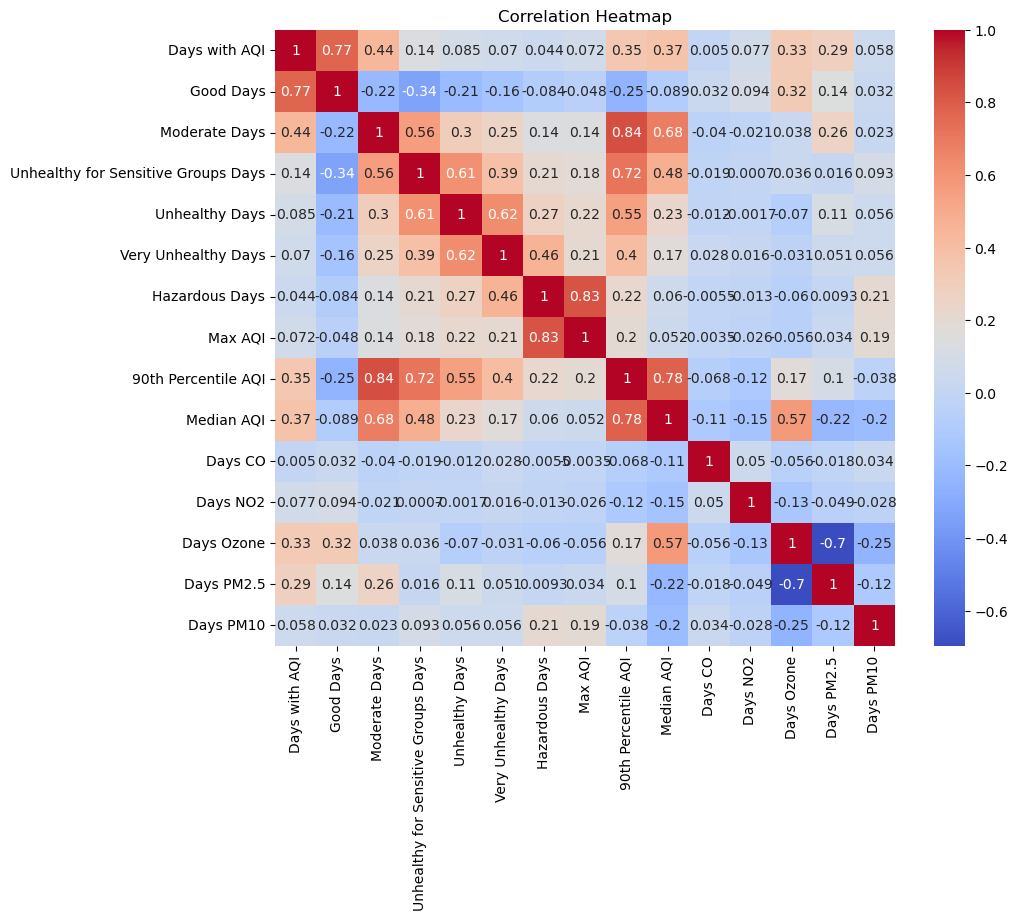

In [7]:
# Heatmap of Correlation Matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Above figure illustrates the correlation heatmap, showcasing the association between every pair of variables.

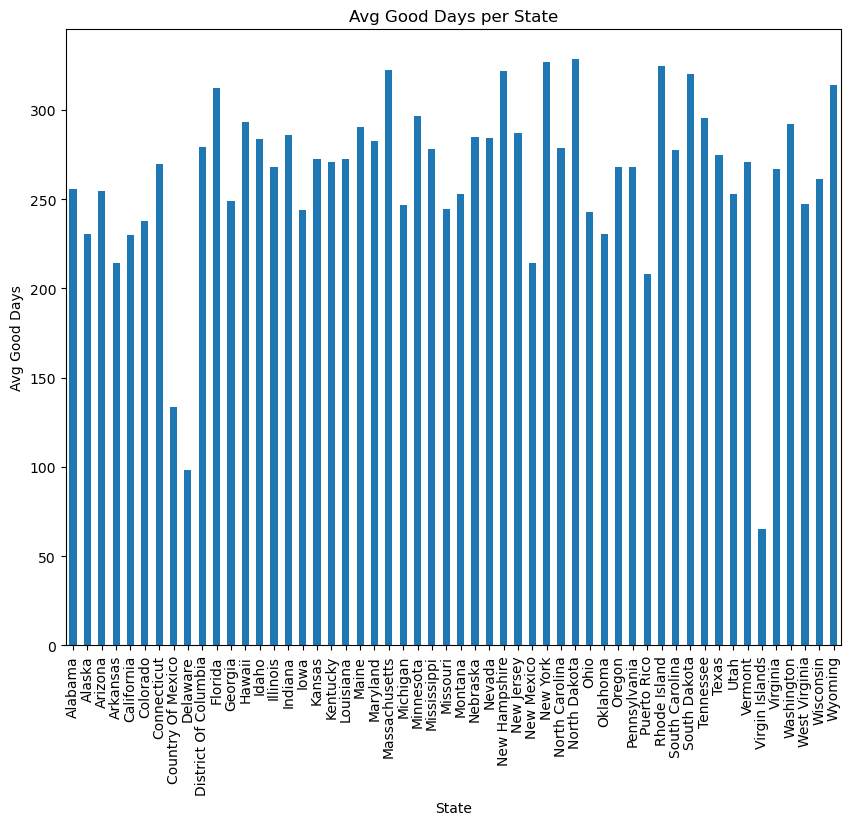

In [8]:
 #Plotting PM2.5 data
plt.figure(figsize=(10, 8))
mean_good_days = df.groupby('State')['Good Days'].mean()
mean_good_days.plot(kind='bar')
plt.ylabel('Avg Good Days')
plt.title('Avg Good Days per State')
plt.show()


Figure  illustrates the mean count of favorable days across various states through a bar chart.